<a href="https://colab.research.google.com/github/chhocker/cse380-notebooks/blob/master/10_2_Ponder_and_Prove_Spanning_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ponder and Prove Spanning Trees
## Due: Saturday, 13 March 2021, 11:59 pm

## The Goal

The goal of this assignment is to investigate spanning trees of graphs.

Here is the example spanning tree you saw in your DPC:

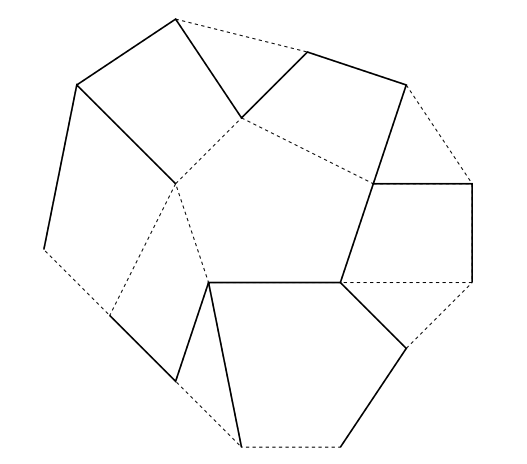

Wikipedia has a [Spanning Tree](https://en.wikipedia.org/wiki/Spanning_tree) page with useful information.

## Algorithm to Find a Spanning Tree

In five pseudocode steps:

1. Start with the "frontier" being a list of size one --- containing just the first node.

2. Pick a link connected to a node in the frontier that does not create a cycle --- that is, the other (destination) node of the link is not already in the frontier.

3. Add that destination node to the frontier unless already there.

4. Add the picked link to the spanning-tree.

5. Repeat steps 2-4 until all nodes are in the frontier.

## What to Create

1. A graph representation --- a way to represent both nodes and links.
2. A function that takes a graph and returns a list of its nodes.
3. A function that takes a graph and returns a list of its links.
4. A function that takes a graph and returns an adjacency list of nodes and links.
5. A function that takes a graph and a node and returns a list of adjacent nodes to that node.

In [51]:
# This class represents the node in any given graph.
class GraphNode():
    def __init__(self, value = 0, links = []):
        self.value = value
        self.links = links
    
    def set_value(self, value):
        self.value = value
    
    def set_links(self, links):
        self.links = links

    def is_link(self, neighbor_value):
        if neighbor_value in links:
            return True
        return False

    def add_link(self, neighbor_value):
      if not neighbor_value in self.links:
        self.links.append(neighbor_value)


    def remove_link(self, neighbor_value):
        link.remove(neighbor_value)

    def __eq__(self, node):
        return self.value == node.value and set(self.links) == set(node.links)

In [52]:
# This class represents a graph with its nodes and links
# It supplies the asked for information
class Graph():
    def __init__(self, nodes = [], links = []):
        self.nodes = []
        for node in nodes:
            adjacent_nodes = [link[1] for link in links if \
                link[0] == node] +[link[0] for link in links if link[1] == node]
            self.nodes.append(GraphNode(node, adjacent_nodes))

    def get_node(self, node_value):
        return next(graphNode for graphNode in self.nodes if graphNode.value == node_value)

    def get_nodes(self):
        return [node.value for node in self.nodes]

    def get_links(self):
        links = [str(adj_list[0]) + str(adjacent_node) for adj_list in self.get_adjacency_list() for adjacent_node in adj_list[1]]
        return list(set(tuple(sorted(link)) for link in links))
    
    def get_adjacent_nodes(self, node_value):
        node = self.get_node(node_value)
        return (node.value, node.links)

    def get_adjacency_list(self):
        return [(graphNode.value, graphNode.links) for graphNode in self.nodes]

    def is_adjacent(self, node_from, node_to):
        self.add_node(node_from)
        node = self.get_node(node_from)
        return node.is_link(node_to)

    def add_node(self, node_value, links = []):
        if not node_value in self.get_nodes():
            self.nodes.append(GraphNode(node_value, links))

  
    def add_link(self, node_from, node_to):
        self.add_node(node_from)
        node = self.get_node(node_from)
        if not node.is_link(node_to):
            node.add_link(node_to)
        self.add_node(node_to)
        node = self.get_node(node_to)
        if not node.is_link(node_from):
            node.add_link(node_from)



In [46]:
# This function generates a ladder graph of size n
def generate_ladder_graph(n):
    # Author: Bretton Steiner
  nodes = [chr(i+97) for i in range(n * 2)]
  links = []
  for i in range(n):
    if (i != 0):
      # The vertical bar links
      links.append((chr((i*2) - 1 + 96), chr((i*2) + 1 + 96)))
      links.append((chr((i*2) + 96), chr((i*2) + 2 + 96)))
    # The horizontal bar link
    links.append((chr((i*2) + 1 + 96), chr((i*2) + 2 + 96)))
    
  return Graph(nodes, links)


In [47]:
import random

# This function finds a spanning tree given a graph
# Author: Mostly Bretton Steiner
def find_spanning_tree(graph):
  # Start with the "frontier" being a list of size one --- containing just the first node.
  frontier = [graph.get_nodes()[0]]
  tree = Graph(graph.get_nodes(), [])

  # Pick a link connected to a node in the frontier that does not create a cycle --- that is, the other (destination) node of the link is not already in the frontier.
  while len(frontier) < len(graph.get_nodes()):
    node = frontier[random.randint(0, len(frontier) - 1)]

    if not set(frontier).issuperset(graph.get_adjacent_nodes(node)[1]):
      available_nodes = list(set(frontier).symmetric_difference(graph.get_adjacent_nodes(node)[1]) - set(frontier))
      dest_node = available_nodes[random.randint(0, len(available_nodes) - 1)]

      # Add that destination node to the frontier unless already there.
      frontier.append(dest_node)

      # Add the picked link to the spanning-tree.
      tree.add_link(node, dest_node)

  return tree



In [63]:
#This function generates a random graph with n nodes
# I started this function, but Bretton used his other function to complete it!
def generate_random_graph(n):
  nodes = [chr(i+97) for i in range(n)]
  links = []
  for node in nodes:
    for i in range(0, random.randint(2, 3)):
      j = random.randint(0, len(nodes)-1)
      if node != nodes[j]:
        links.append((node, nodes[j]))
  return Graph(nodes, links)


In [48]:
import graphviz

# This function displays a graph
def display_graph(graph, engine = 'fdp'):
  graphic = graphviz.Graph(format='png')
  # graphic.edges([str(adj_list[0]) + str(adjacent_node) for adj_list in graph.get_adjacency_list() for adjacent_node in adj_list[1]])
  graphic.edges([str(link[0]) + str(link[1]) for link in graph.get_links()])
  graphic.engine = engine
  return graphic

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q']
[('h', 'k'), ('m', 'o'), ('h', 'i'), ('k', 'l'), ('c', 'n'), ('f', 'g'), ('d', 'f'), ('c', 'q'), ('p', 'q'), ('c', 'e'), ('a', 'q'), ('n', 'p'), ('e', 'f'), ('i', 'j'), ('b', 'd'), ('b', 'c'), ('a', 'b'), ('j', 'l'), ('o', 'p'), ('g', 'h'), ('n', 'o'), ('l', 'm'), ('e', 'h'), ('k', 'n'), ('j', 'k'), ('g', 'i'), ('d', 'e')]
[('a', ['b', 'q']), ('b', ['c', 'd', 'a']), ('c', ['n', 'q', 'b', 'e']), ('d', ['e', 'f', 'b']), ('e', ['c', 'h', 'f', 'd']), ('f', ['g', 'd', 'e']), ('g', ['h', 'i', 'f']), ('h', ['k', 'i', 'e', 'g']), ('i', ['j', 'g', 'h']), ('j', ['k', 'l', 'i']), ('k', ['l', 'n', 'h', 'j']), ('l', ['m', 'j', 'k']), ('m', ['o', 'l']), ('n', ['o', 'p', 'c', 'k']), ('o', ['m', 'n', 'p']), ('p', ['o', 'q', 'n']), ('q', ['a', 'c', 'p'])]
['hk', 'mo', 'hi', 'kl', 'cn', 'fg', 'df', 'cq', 'pq', 'ce', 'aq', 'np', 'ef', 'ij', 'bd', 'bc', 'ab', 'jl', 'op', 'gh', 'no', 'lm', 'eh', 'kn', 'jk', 'gi', 'de']


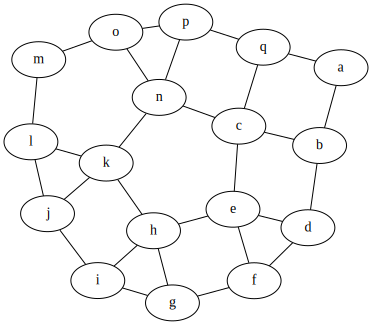

In [53]:
# Brother Neff's graph
nodes = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q']
links = [
  ('a', 'b'), ('a', 'q'), ('b', 'c'), ('b', 'd'), ('c', 'n'), ('c', 'q'), ('d', 'e'), ('d', 'f'), ('e', 'c'),
  ('e', 'h'), ('e', 'f'), ('f', 'g'), ('g', 'h'), ('g', 'i'), ('h', 'k'), ('h', 'i'), ('i', 'j'), ('j', 'k'),
  ('j', 'l'), ('k', 'l'), ('k', 'n'), ('l', 'm'), ('m', 'o'), ('n', 'o'), ('n', 'p'), ('p', 'o'), ('p', 'q')
]

neff_graph = Graph(nodes, links)

print(neff_graph.get_nodes())
print(neff_graph.get_links())
print(neff_graph.get_adjacency_list())
print([str(link[0]) + str(link[1]) for link in neff_graph.get_links()])

display_graph(neff_graph, 'neato')

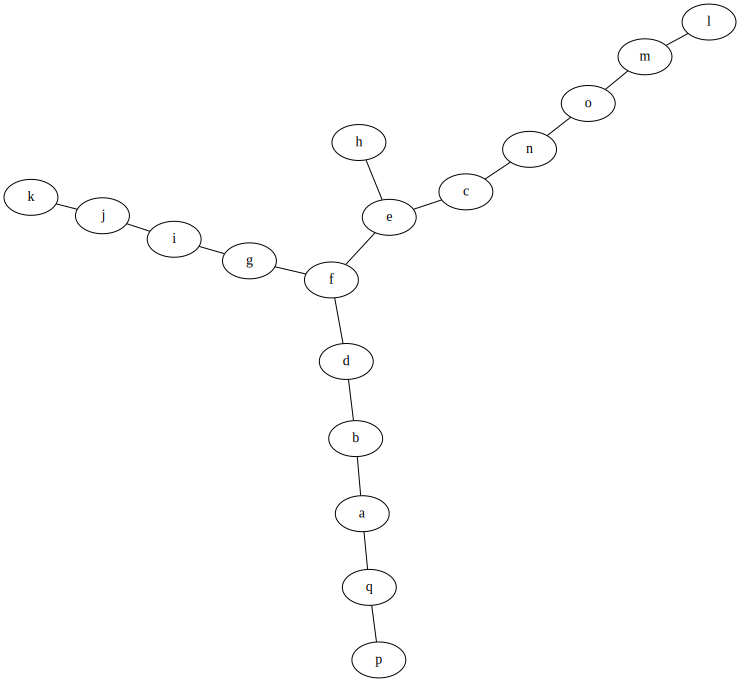

In [55]:
# Span tree of Neff graph
span_tree = find_spanning_tree(neff_graph)
display_graph(span_tree, 'neato')

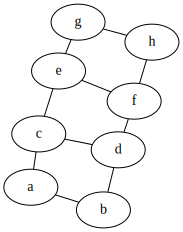

In [56]:
ladder = generate_ladder_graph(4)
display_graph(ladder)

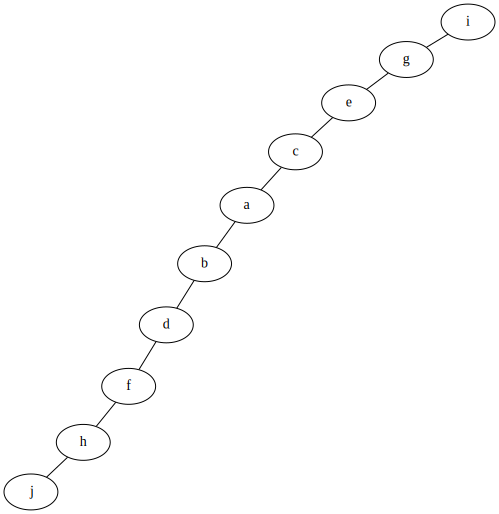

In [76]:
ladder_span = find_spanning_tree(ladder)
display_graph(ladder_span, "neato")

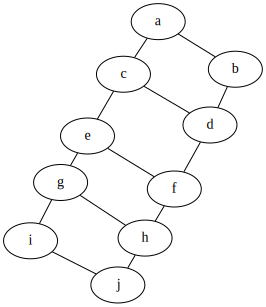

In [60]:
ladder = generate_ladder_graph(5)
display_graph(ladder)

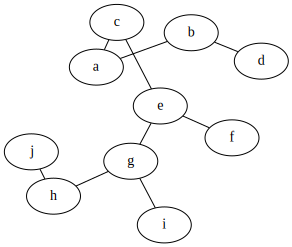

In [61]:
ladder_span = find_spanning_tree(ladder)
display_graph(ladder_span)

Number of links: 49


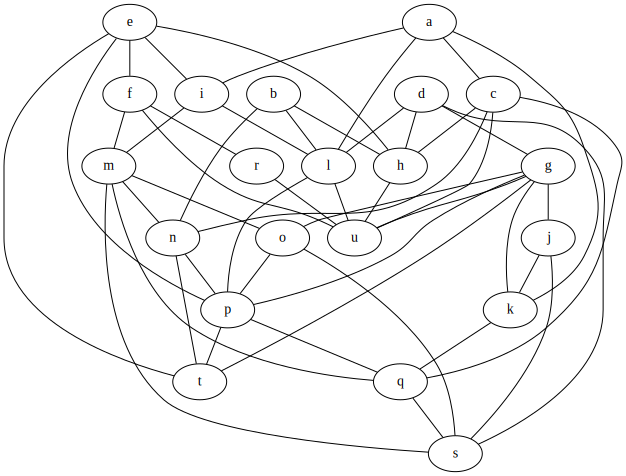

In [70]:
# Random graph with 21 nodes
graph = generate_random_graph(21)
print("Number of links:", len(graph.get_links()))
display_graph(graph, "dot")

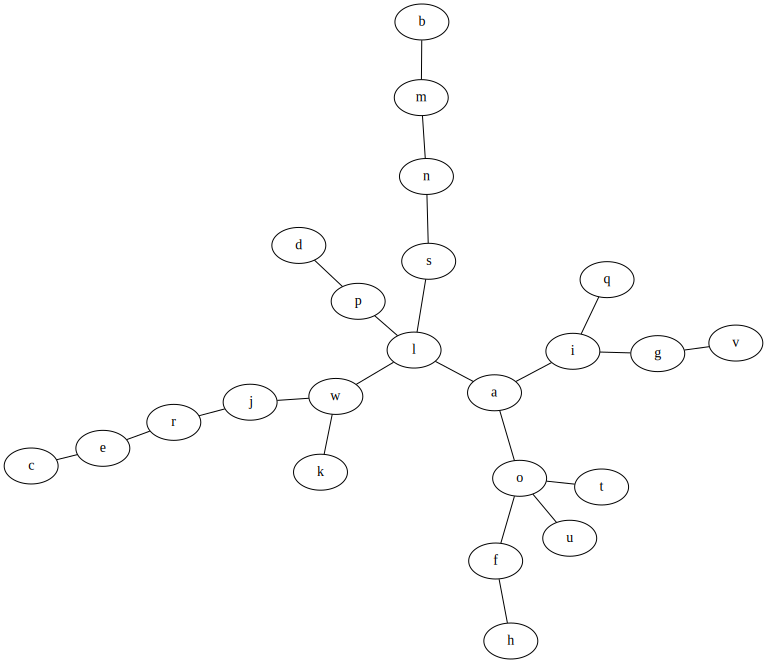

In [77]:
graph_span = find_spanning_tree(graph)
display_graph(graph_span, "neato")

Number of links: 48


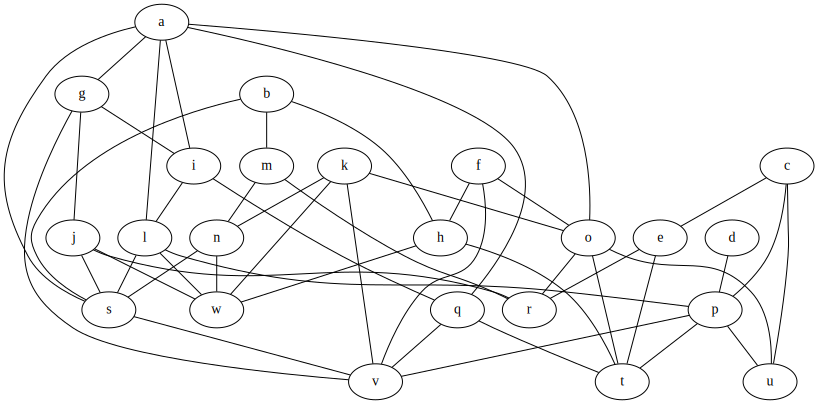

In [74]:
# Random graph with 23 nodes
graph = generate_random_graph(23)
print("Number of links:", len(graph.get_links()))
display_graph(graph, "dot")

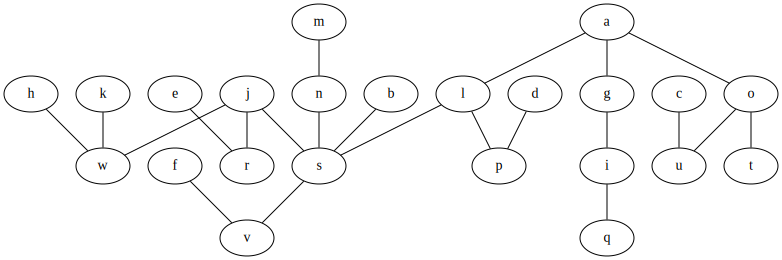

In [75]:
graph_span = find_spanning_tree(graph)
display_graph(graph_span, "neato")

Number of links: 56


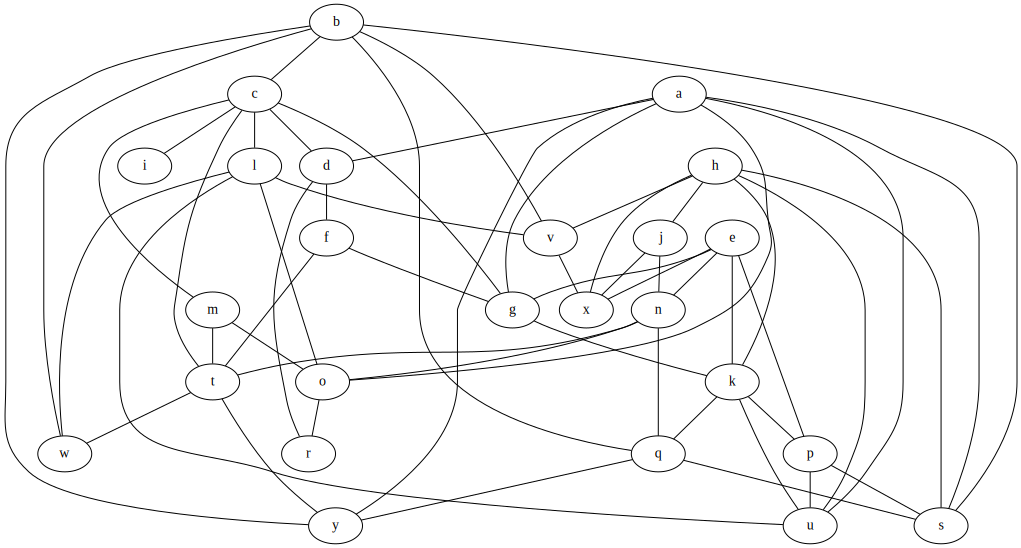

In [78]:
# Random graph with 25 nodes
graph = generate_random_graph(25)
print("Number of links:", len(graph.get_links()))
display_graph(graph, "dot")

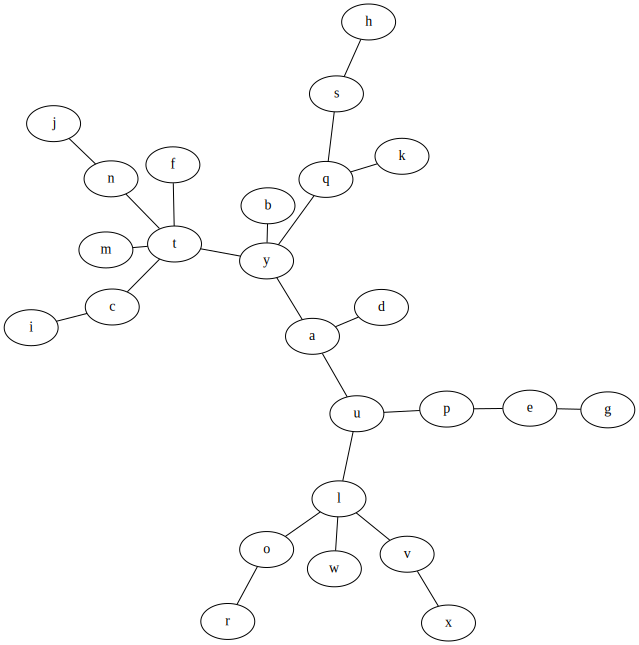

In [79]:
graph_span = find_spanning_tree(graph)
display_graph(graph_span, "neato")

## Test Your Code

You will need several different types of graphs (including ladder graphs) with which to test your algorithm.


See the self-assessment for specifics.

# DONE My Report on What I Did and What I Learned

## Fun


I did have fun! Displaying the graphs was awesome. We used different engines for displaying, and it was interesting to compare the different ways to display the graph.

## New

I learned how to create spanning trees! All week I have been a little confused about what they are and how on Earth I would create an algorithm to build one. Bretton really helped me understand how to do it.

## Meaningful


Working so well as a team has been very meaningful to me. I feel like it has really changed my perspective of this class!


## Other

I worked with Hannah, Daniel, and Bretton. I've given credit to them in the code.
We went above and beyond and displayed the graphs!

# DONE What is True?
Click on each warranted checkbox to toggle it to True (or back to False). 

NOTE: *This only works in Colab. If you run it in some other Jupyter notebook client/server environment you may have to change False to True (or vice versa) manually.*

This self-assessment is subject to revision by a grader.

In [81]:
#@markdown ## What is True about what I did?
#@markdown ### I had fun.
cb00 = True #@param {type:'boolean'}
#@markdown ### I learned something new.
cb01 = True #@param {type:'boolean'}
#@markdown ### I achieved something meaningful, or something I can build upon at a later time.
cb02 = True #@param {type:'boolean'}
#@markdown ## What is True about my report?
#@markdown ### I wrote a sufficient number of well-written sentences.
cb03 = True #@param {type:'boolean'}
#@markdown ### My report is free of mechanical infelicities.
cb04 = True #@param {type:'boolean'}
#@markdown ### I used Grammarly (or something better described in my report) to check for MIs.
cb05 = True #@param {type:'boolean'}
#@markdown ### I reported on any connections I found between these problems and something I already know. 
cb06 = True #@param {type:'boolean'}
#@markdown ### I reported who were and what contribution each of my collaborators made.
cb07 = True #@param {type:'boolean'}
#@markdown ## What is True about my code?
#@markdown ### I created code to represent a graph as (at a bare minimum) a set of nodes and a set of links.
cb08 = True #@param {type:'boolean'}
#@markdown ### I wrote a function that takes a graph and returns a list of its nodes.
cb09 = True #@param {type:'boolean'}
#@markdown ### I wrote a function that takes a graph and returns a list of its links.
cb10 = True #@param {type:'boolean'}
#@markdown ### I wrote a function that takes a graph and returns an adjacency list of nodes and links.
cb11 = True #@param {type:'boolean'}
#@markdown ### I wrote a function that takes a graph and a node and returns a list of adjacent nodes to that node.
cb12 = True #@param {type:'boolean'}
#@markdown ### I correctly implemented the spanning tree algorithm.
cb13 = True #@param {type:'boolean'}
#@markdown ## What is true about my testing?
#@markdown ### I created a ladder graph with 2 rungs and tested my code on it.
cb14 = True #@param {type:'boolean'}
#@markdown ### I created a ladder graph with 3 rungs and tested my code on it.
cb15 = True #@param {type:'boolean'}
#@markdown ### I created a ladder graph with 4 rungs and tested my code on it.
cb16 = True #@param {type:'boolean'}
#@markdown ### I created a ladder graph with 5 rungs and tested my code on it.
cb17 = True #@param {type:'boolean'}
#@markdown ### I created a graph from the example at the top of this notebook and tested my code on it.
cb18 = True #@param {type:'boolean'}
#@markdown ### I created three larger graphs (each with more than 20 nodes and more than 40 links) of my own devising and tested my code on it.
cb19 = True #@param {type:'boolean'}

## DO NOT CHANGE ANYTHING IN THE NEXT CODE CELL!!
### Delete this cell and the following ones before submitting your work.

In [82]:
points_for_what_I_did = [5]*3
points_for_my_report = [8]*5
points_for_my_code = [5]*6
points_for_my_testing = [2]*4 + [3,4]
points = points_for_what_I_did + points_for_my_report + points_for_my_code + points_for_my_testing
# cb is short for checkbox
total = sum(map(lambda n, p: p if eval(f'cb{n:02}') else 0,
                range(len(points)), points))             
total

100

# For graders

In [83]:
#@markdown ---
number_of_MIs_found = 0 #@param {type: 'slider', min: 0, max: 5}
#@markdown ---
